In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("IceAlex (1).csv",index_col=0)
df.head()

,Code,Email,Phone Number,Gender,Title,Organization,Area of expertise,Years of Experience,Social Media,CV,...,Projcet 1,Projcet 1 Year,Project 1 hourly rate (EGP),Project 2,Projcet 2 Year,Project 2 hourly rate (EGP),Project 3,Projcet 3 Year,Project 3 hourly rate (EGP),Satifaction rate %
#,,,,,,,,,,,,,,,,,,,,,
1,Trainer 1,trainer1@gmail.com,1253334345,Female,Business Developer,Na,Business Development,4,NaN,Na,...,Startups of Alex,2023,400,NaN,NaN,NaN,NaN,NaN,NaN,81.00%
2,Trainer 2,trainer1@gmail.com,1253334345,Male,Business Consultant,Na,(Business Model) Innovation Consultancy,4,NaN,Na,...,TIEC Pre-incubation,2024,600,NaN,NaN,NaN,NaN,NaN,NaN,21.52%
3,Trainer 3,trainer1@gmail.com,1253334345,Female,Marketier,Na,Digital Marketing,5,NaN,Na,...,Talent4Startups,2024,400,NaN,NaN,NaN,NaN,NaN,NaN,55.81%
4,Trainer 4,trainer1@gmail.com,1253334345,Male,Business Consultant,Na,Business consultancy,6,NaN,Na,...,Startups of Alex,2023,500,NaN,NaN,NaN,NaN,NaN,NaN,57.45%
5,Trainer 5,trainer1@gmail.com,1253334345,Female,Project manager,Na,Impact Management,4,NaN,Na,...,Ladies Startups League Superstar,2023,200,NaN,NaN,NaN,NaN,NaN,NaN,32.19%


In [3]:
#columns names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Code                         30 non-null     object 
 1   Email                        30 non-null     object 
 2   Phone Number                 30 non-null     int64  
 3   Gender                       30 non-null     object 
 4   Title                        30 non-null     object 
 5   Organization                 30 non-null     object 
 6   Area of expertise            30 non-null     object 
 7   Years of Experience          30 non-null     int64  
 8   Social Media                 0 non-null      float64
 9   CV                           30 non-null     object 
 10  No. Projects Joined          30 non-null     int64  
 11   Projcet 1                   26 non-null     object 
 12   Projcet 1 Year              30 non-null     int64  
 13  Project 1 hourly rate 

In [4]:
#Remove white spaces from column name
df.columns=df.columns.str.strip()
df.columns

Index(['Code', 'Email', 'Phone Number', 'Gender', 'Title', 'Organization',
       'Area of expertise', 'Years of Experience', 'Social Media', 'CV',
       'No. Projects Joined', 'Projcet 1', 'Projcet 1 Year',
       'Project 1 hourly rate (EGP)', 'Project 2', 'Projcet 2 Year',
       'Project 2 hourly rate (EGP)', 'Project 3', 'Projcet 3 Year',
       'Project 3 hourly rate (EGP)', 'Satifaction rate %'],
      dtype='object')

In [5]:
#Unpivot data from wide to long format
project=df.loc[:,['Projcet 1','Project 2','Project 3']].melt(value_name='Project').drop("variable",axis=1)
year=df.loc[:,['Projcet 1 Year','Projcet 2 Year','Projcet 3 Year']].melt(value_name='Project_year').drop("variable",axis=1)
rate=df.loc[:,['Project 1 hourly rate (EGP)','Project 2 hourly rate (EGP)','Project 3 hourly rate (EGP)']].melt(value_name='Project_hourly_rate').drop("variable",axis=1)

In [6]:
#drop unpivoted column and concatenate new columns
df=pd.melt(df,id_vars=['Code', 'Email', 'Phone Number', 'Gender', 'Title', 'Organization','Area of expertise', 'Years of Experience', 'Social Media', 'CV',
       'No. Projects Joined','Projcet 1 Year',
       'Project 1 hourly rate (EGP)', 'Projcet 2 Year',
       'Project 2 hourly rate (EGP)', 'Projcet 3 Year',
       'Project 3 hourly rate (EGP)', 'Satifaction rate %'],value_vars=['Projcet 1','Project 2','Project 3'],value_name="Project").drop('variable',axis=1)
df


,Code,Email,Phone Number,Gender,Title,Organization,Area of expertise,Years of Experience,Social Media,CV,No. Projects Joined,Projcet 1 Year,Project 1 hourly rate (EGP),Projcet 2 Year,Project 2 hourly rate (EGP),Projcet 3 Year,Project 3 hourly rate (EGP),Satifaction rate %,Project
0,Trainer 1,trainer1@gmail.com,1253334345,Female,Business Developer,Na,Business Development,4,NaN,Na,1,2023,400,NaN,NaN,NaN,NaN,81.00%,Startups of Alex
1,Trainer 2,trainer1@gmail.com,1253334345,Male,Business Consultant,Na,(Business Model) Innovation Consultancy,4,NaN,Na,1,2024,600,NaN,NaN,NaN,NaN,21.52%,TIEC Pre-incubation
2,Trainer 3,trainer1@gmail.com,1253334345,Female,Marketier,Na,Digital Marketing,5,NaN,Na,1,2024,400,NaN,NaN,NaN,NaN,55.81%,Talent4Startups
3,Trainer 4,trainer1@gmail.com,1253334345,Male,Business Consultant,Na,Business consultancy,6,NaN,Na,1,2023,500,NaN,NaN,NaN,NaN,57.45%,Startups of Alex
4,Trainer 5,trainer1@gmail.com,1253334345,Female,Project manager,Na,Impact Management,4,NaN,Na,1,2023,200,NaN,NaN,NaN,NaN,32.19%,Ladies Startups League Superstar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Trainer 26,trainer1@gmail.com,1253334345,Male,Project manager,Na,Senior Consultant & Learning Management Expert,8,NaN,Na,1,2022,200,NaN,NaN,NaN,NaN,78.67%,NaN
86,Trainer 27,trainer1@gmail.com,1253334345,Male,Marketier,Na,Digital Marketing,6,NaN,Na,2,2023,100,2024.0,500.0,NaN,NaN,80.76%,NaN
87,Trainer 28,trainer1@gmail.com,1253334345,Male,Finance director,Na,Finance,5,NaN,Na,1,2023,400,NaN,NaN,NaN,NaN,82.84%,NaN
88,Trainer 29,trainer1@gmail.com,1253334345,Female,Enterpreneur,Na,Curriculum Development Consultant,4,NaN,Na,1,2023,300,NaN,NaN,NaN,NaN,84.93%,NaN


In [7]:
df=pd.melt(df,id_vars=['Code', 'Email', 'Phone Number', 'Gender', 'Title', 'Organization','Area of expertise', 'Years of Experience', 'Social Media', 'CV',
       'No. Projects Joined','Project 1 hourly rate (EGP)', 'Project 2 hourly rate (EGP)', 'Project 3 hourly rate (EGP)', "Project",'Satifaction rate %']
          ,value_vars=['Projcet 1 Year','Projcet 2 Year','Projcet 3 Year'],value_name="Project_year").drop('variable',axis=1)
df

,Code,Email,Phone Number,Gender,Title,Organization,Area of expertise,Years of Experience,Social Media,CV,No. Projects Joined,Project 1 hourly rate (EGP),Project 2 hourly rate (EGP),Project 3 hourly rate (EGP),Project,Satifaction rate %,Project_year
0,Trainer 1,trainer1@gmail.com,1253334345,Female,Business Developer,Na,Business Development,4,NaN,Na,1,400,NaN,NaN,Startups of Alex,81.00%,2023.0
1,Trainer 2,trainer1@gmail.com,1253334345,Male,Business Consultant,Na,(Business Model) Innovation Consultancy,4,NaN,Na,1,600,NaN,NaN,TIEC Pre-incubation,21.52%,2024.0
2,Trainer 3,trainer1@gmail.com,1253334345,Female,Marketier,Na,Digital Marketing,5,NaN,Na,1,400,NaN,NaN,Talent4Startups,55.81%,2024.0
3,Trainer 4,trainer1@gmail.com,1253334345,Male,Business Consultant,Na,Business consultancy,6,NaN,Na,1,500,NaN,NaN,Startups of Alex,57.45%,2023.0
4,Trainer 5,trainer1@gmail.com,1253334345,Female,Project manager,Na,Impact Management,4,NaN,Na,1,200,NaN,NaN,Ladies Startups League Superstar,32.19%,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Trainer 26,trainer1@gmail.com,1253334345,Male,Project manager,Na,Senior Consultant & Learning Management Expert,8,NaN,Na,1,200,NaN,NaN,NaN,78.67%,NaN
266,Trainer 27,trainer1@gmail.com,1253334345,Male,Marketier,Na,Digital Marketing,6,NaN,Na,2,100,500.0,NaN,NaN,80.76%,NaN
267,Trainer 28,trainer1@gmail.com,1253334345,Male,Finance director,Na,Finance,5,NaN,Na,1,400,NaN,NaN,NaN,82.84%,NaN
268,Trainer 29,trainer1@gmail.com,1253334345,Female,Enterpreneur,Na,Curriculum Development Consultant,4,NaN,Na,1,300,NaN,NaN,NaN,84.93%,NaN


In [8]:
df=pd.melt(df,id_vars=['Code', 'Email', 'Phone Number', 'Gender', 'Title', 'Organization','Area of expertise', 'Years of Experience', 'Social Media', 'CV',
       'No. Projects Joined', "Project",'Project_year','Satifaction rate %']
          ,value_vars=['Project 1 hourly rate (EGP)','Project 2 hourly rate (EGP)','Project 3 hourly rate (EGP)'],value_name="Project_yearly_rate").drop('variable',axis=1)
df

,Code,Email,Phone Number,Gender,Title,Organization,Area of expertise,Years of Experience,Social Media,CV,No. Projects Joined,Project,Project_year,Satifaction rate %,Project_yearly_rate
0,Trainer 1,trainer1@gmail.com,1253334345,Female,Business Developer,Na,Business Development,4,NaN,Na,1,Startups of Alex,2023.0,81.00%,400.0
1,Trainer 2,trainer1@gmail.com,1253334345,Male,Business Consultant,Na,(Business Model) Innovation Consultancy,4,NaN,Na,1,TIEC Pre-incubation,2024.0,21.52%,600.0
2,Trainer 3,trainer1@gmail.com,1253334345,Female,Marketier,Na,Digital Marketing,5,NaN,Na,1,Talent4Startups,2024.0,55.81%,400.0
3,Trainer 4,trainer1@gmail.com,1253334345,Male,Business Consultant,Na,Business consultancy,6,NaN,Na,1,Startups of Alex,2023.0,57.45%,500.0
4,Trainer 5,trainer1@gmail.com,1253334345,Female,Project manager,Na,Impact Management,4,NaN,Na,1,Ladies Startups League Superstar,2023.0,32.19%,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,Trainer 26,trainer1@gmail.com,1253334345,Male,Project manager,Na,Senior Consultant & Learning Management Expert,8,NaN,Na,1,NaN,NaN,78.67%,NaN
806,Trainer 27,trainer1@gmail.com,1253334345,Male,Marketier,Na,Digital Marketing,6,NaN,Na,2,NaN,NaN,80.76%,NaN
807,Trainer 28,trainer1@gmail.com,1253334345,Male,Finance director,Na,Finance,5,NaN,Na,1,NaN,NaN,82.84%,NaN
808,Trainer 29,trainer1@gmail.com,1253334345,Female,Enterpreneur,Na,Curriculum Development Consultant,4,NaN,Na,1,NaN,NaN,84.93%,NaN


**Check Null and Duplicates**

In [9]:
df.shape

(810, 15)

In [10]:
#check for duplicates
df.duplicated().sum()

481

In [11]:
#Drop Duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Code                     0
Email                    0
Phone Number             0
Gender                   0
Title                    0
Organization             0
Area of expertise        0
Years of Experience      0
Social Media           329
CV                       0
No. Projects Joined      0
Project                138
Project_year           139
Satifaction rate %       0
Project_yearly_rate    112
dtype: int64

In [13]:
df.drop(["Social Media","CV","Organization"],axis=1,inplace=True)

In [14]:
df.isnull().sum()

Code                     0
Email                    0
Phone Number             0
Gender                   0
Title                    0
Area of expertise        0
Years of Experience      0
No. Projects Joined      0
Project                138
Project_year           139
Satifaction rate %       0
Project_yearly_rate    112
dtype: int64

In [15]:
df.dropna(inplace=True)
df.isnull().sum()

Code                   0
Email                  0
Phone Number           0
Gender                 0
Title                  0
Area of expertise      0
Years of Experience    0
No. Projects Joined    0
Project                0
Project_year           0
Satifaction rate %     0
Project_yearly_rate    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 624
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code                 82 non-null     object 
 1   Email                82 non-null     object 
 2   Phone Number         82 non-null     int64  
 3   Gender               82 non-null     object 
 4   Title                82 non-null     object 
 5   Area of expertise    82 non-null     object 
 6   Years of Experience  82 non-null     int64  
 7   No. Projects Joined  82 non-null     int64  
 8   Project              82 non-null     object 
 9   Project_year         82 non-null     float64
 10  Satifaction rate %   82 non-null     object 
 11  Project_yearly_rate  82 non-null     float64
dtypes: float64(2), int64(3), object(7)
memory usage: 8.3+ KB


**Fix Data types**

In [18]:
df['Phone Number']=df['Phone Number'].astype(str)
df['Gender']=df['Gender'].astype('category')
df['Project_year']=df['Project_year'].astype(int)
df['Project_year']=df['Project_year'].astype(str)

In [19]:
df['Satifaction rate %']=df['Satifaction rate %'].str.replace("%","")
df['Satifaction rate %']=df['Satifaction rate %'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 624
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Code                 82 non-null     object  
 1   Email                82 non-null     object  
 2   Phone Number         82 non-null     object  
 3   Gender               82 non-null     category
 4   Title                82 non-null     object  
 5   Area of expertise    82 non-null     object  
 6   Years of Experience  82 non-null     int64   
 7   No. Projects Joined  82 non-null     int64   
 8   Project              82 non-null     object  
 9   Project_year         82 non-null     object  
 10  Satifaction rate %   82 non-null     float64 
 11  Project_yearly_rate  82 non-null     float64 
dtypes: category(1), float64(2), int64(2), object(7)
memory usage: 7.9+ KB


**Analysis**

In [22]:
df.describe()

,Years of Experience,No. Projects Joined,Satifaction rate %,Project_yearly_rate
count,82.000000,82.000000,82.000000,82.000000
mean,6.451220,1.682927,61.734634,335.000000
std,1.325462,0.664404,27.496569,143.812721
min,3.000000,1.000000,2.060000,100.000000
25%,6.000000,1.000000,56.190000,210.000000
50%,7.000000,2.000000,66.160000,350.000000
75%,7.750000,2.000000,82.380000,450.000000
max,8.000000,3.000000,99.350000,600.000000


In [23]:
df.describe(include="object")

,Code,Email,Phone Number,Title,Area of expertise,Project,Project_year
count,82,82,82,82,82,82,82
unique,26,1,1,10,19,12,4
top,Trainer 25,trainer1@gmail.com,1253334345,Business Consultant,Digital Marketing,Heya Raeda,2023
freq,9,82,82,24,20,20,44


In [24]:
for col in df.columns:
    if df[col].dtype=="object":
        print(f'{col} unique values: {df[col].nunique()}')
        print(f"{df[col].value_counts()}")
        print()

Code unique values: 26
Trainer 25    9
Trainer 30    8
Trainer 27    8
Trainer 11    8
Trainer 20    8
Trainer 8     6
Trainer 9     6
Trainer 10    6
Trainer 18    6
Trainer 16    1
Trainer 29    1
Trainer 28    1
Trainer 26    1
Trainer 19    1
Trainer 17    1
Trainer 1     1
Trainer 15    1
Trainer 2     1
Trainer 13    1
Trainer 12    1
Trainer 7     1
Trainer 6     1
Trainer 5     1
Trainer 4     1
Trainer 3     1
Trainer 14    1
Name: Code, dtype: int64

Email unique values: 1
trainer1@gmail.com    82
Name: Email, dtype: int64

Phone Number unique values: 1
1253334345    82
Name: Phone Number, dtype: int64

Title unique values: 10
Business Consultant     24
Marketier               20
Finance director        10
Enterpreneur             9
Business Expert          6
Senior Consultant        6
Project manager          2
Frontend developer       2
Backend developer        2
Business Developer       1
Name: Title, dtype: int64

Area of expertise unique values: 19
Digital Marketing     

In [25]:
trainer_project=df.groupby('Code')['No. Projects Joined'].count()
trainer_project

Code
Trainer 1     1
Trainer 10    6
Trainer 11    8
Trainer 12    1
Trainer 13    1
Trainer 14    1
Trainer 15    1
Trainer 16    1
Trainer 17    1
Trainer 18    6
Trainer 19    1
Trainer 2     1
Trainer 20    8
Trainer 25    9
Trainer 26    1
Trainer 27    8
Trainer 28    1
Trainer 29    1
Trainer 3     1
Trainer 30    8
Trainer 4     1
Trainer 5     1
Trainer 6     1
Trainer 7     1
Trainer 8     6
Trainer 9     6
Name: No. Projects Joined, dtype: int64

In [26]:
df.columns

Index(['Code', 'Email', 'Phone Number', 'Gender', 'Title', 'Area of expertise',
       'Years of Experience', 'No. Projects Joined', 'Project', 'Project_year',
       'Satifaction rate %', 'Project_yearly_rate'],
      dtype='object')

In [27]:
df.head()

,Code,Email,Phone Number,Gender,Title,Area of expertise,Years of Experience,No. Projects Joined,Project,Project_year,Satifaction rate %,Project_yearly_rate
0,Trainer 1,trainer1@gmail.com,1253334345,Female,Business Developer,Business Development,4,1,Startups of Alex,2023,81.00,400.0
1,Trainer 2,trainer1@gmail.com,1253334345,Male,Business Consultant,(Business Model) Innovation Consultancy,4,1,TIEC Pre-incubation,2024,21.52,600.0
2,Trainer 3,trainer1@gmail.com,1253334345,Female,Marketier,Digital Marketing,5,1,Talent4Startups,2024,55.81,400.0
3,Trainer 4,trainer1@gmail.com,1253334345,Male,Business Consultant,Business consultancy,6,1,Startups of Alex,2023,57.45,500.0
4,Trainer 5,trainer1@gmail.com,1253334345,Female,Project manager,Impact Management,4,1,Ladies Startups League Superstar,2023,32.19,200.0


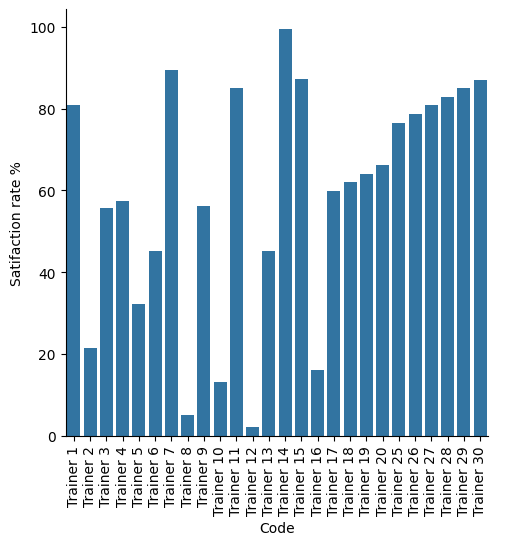

In [28]:
sns.catplot(data=df,x="Code",y="Satifaction rate %",kind="bar")
plt.xticks(rotation=90)
plt.show()

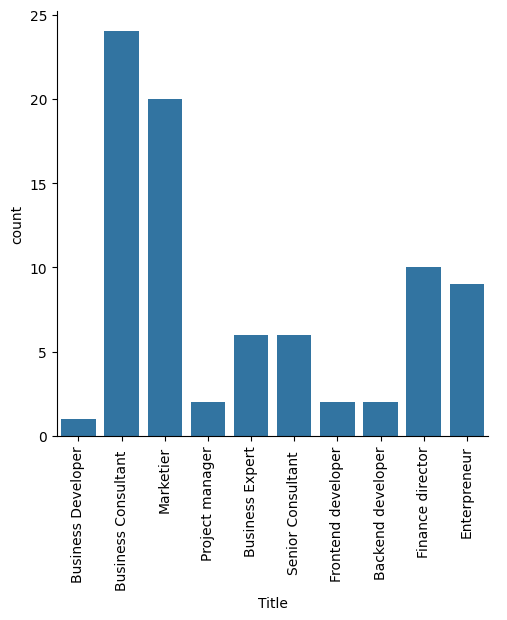

In [29]:
sns.catplot(data=df,x="Title",kind="count")
plt.xticks(rotation=90)
plt.show()